In [ ]:
# WIP: todo load a video, 
# detect bouding box
# run a collision model?
# TODO: It seems there are labels for both videos and images.
# There are endzone and sideline types of videos.
# Easiest way to build a model? 
# Detr model using Pytorch Lightning?
# EfficientDet model? Yes, based on the following: https://github.com/rwightman/efficientdet-pytorch
# Add link to streamlit app later? => https://share.streamlit.io/yassinealouini/nfl-impact-streamlit/app.py
# Use create_model from effdet.factory.
# There is a problem with making effdet work. How to fix?
# Maybe use YOLO5 instead of EfficientDet?

In [ ]:
import pandas as pd
from pathlib import Path
import cv2
from PIL import Image
import matplotlib.pylab as plt
%matplotlib inline 

In [ ]:
IMAGE_LABELS_PATH = "../input/nfl-impact-detection/image_labels.csv"
TRAIN_LABELS_PATH = "../input/nfl-impact-detection/train_labels.csv"
TRAIN_TRACKING_PATH = "../input/nfl-impact-detection/train_player_tracking.csv"
TEST_TRACKING_PATH = "../input/nfl-impact-detection/test_player_tracking.csv"

# Let's start with the labels

It seems there are labels for two types of files: 
    
    
* **videos** => these are in the `train_labels.csv`. 
* **images** => these are in the `image_labels.csv`. 

One question we will try to answer later is: is there an overlap between the different labels?

## Image labels

These are localted in the `image_labels.csv` file.

In [ ]:
ìmg_labels_df = pd.read_csv(IMAGE_LABELS_PATH)

In [ ]:
ìmg_labels_df.sample(2).T

So what are we looking at?


* `image`: the id of an image, we will open one just afterwards.
* `label`: how many are there?

The, the remaining `4` columns form a bounding box by providing a **top-left corner**, a **width** and a **height**. 

Again, we will overlay a bounding box on top of an image.

Let's do this.

In [ ]:
IMG_ID = "58084_000728_Sideline_frame0989.jpg"
IMG_PATH = Path("../input/nfl-impact-detection/images/") / IMG_ID

In [ ]:
bboxes = labels_df.loc[lambda df: df["image"] == IMG_ID, ["left", "top", "width", "height"]].values

In [ ]:


img = cv2.imread(IMG_PATH.as_posix())

for x, y, w, h in bboxes:
    x1 = x
    y1 = y
    x2 = x + w
    y2 = y + h
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

    
height, width, channels = img.shape


width_to_height = int(width / height)



fig, ax = plt.subplots(1, 1, figsize=(20 * width_to_height, 20))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

That's neat!

## Video labels

These are localted in the `train_labels.csv` file.

In [ ]:
train_labels_df = pd.read_csv(TRAIN_LABELS_PATH)

In [ ]:
train_labels_df.sample(2).T

Here we have much more information compared to the image labels: 
    
    
* 
* 
* 
* 

# Other labels?

In addition to the usual sample_submission.csv file, there is one last type of labels: 
    
- train_player_tracking.csv
- test_player_tracking.csv


What are these about?

In [ ]:
tracking_df = pd.read_csv(TRAIN_TRACKING_PATH)

In [ ]:
tracking_df.sample(2).T

# What about inputs? 

There are of two kinds: videos and images. 

## Video inputs

Well, we have a bunch of training videos. So let's explore some of these.


In [ ]:
TRAINING_VIDEOS_FOLDER = Path("../input/nfl-impact-detection/train/")
VIDEO_PATHS = TRAINING_VIDEOS_FOLDER.glob("*.mp4")

In [ ]:


def play(video_path):
    cap = cv2.VideoCapture(video_path)
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        yield plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
player = play(next(VIDEO_PATHS).as_posix())

In [ ]:
for _ in range(5):
    next(player)

In [ ]:
# there are also images. Explore these. How are they related ? 

# Image inputs

## Evaluation metric

Let's analyze the competition metric. 


Seen from afar, it looks like a classic detection metric with the IoU. Let's have a closer look on the description page: 

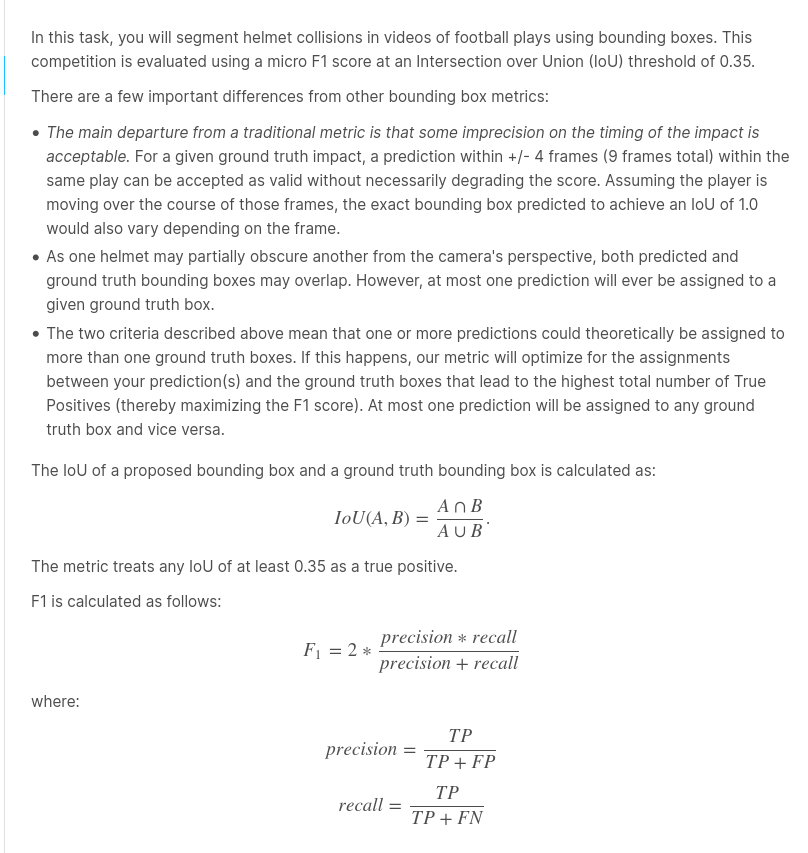

Here are few things to keep in mind:
    
* 9 frames would be considered when scoring: 4 before, the current frame, and the 4 next ones.
* One helmet can obscure another one so some predictions can be assigned to one or more ground truths.



Here is an example to make things more clear.

TODO: Take a video with bounding boxes, make some predictions, and compute the metric.

## IoU and F1 for object detection

In order to understand the competition metric, we first need to make a small detour by IoU for object detection.


What is IoU?


This stands for intersection over union. 

We will compute it for two bounding boxes: the true bounding box and the detected one.

If the detection is pecfect, both bounding boxes will overlap and the IoU score will be 1
On the other hand if the detection is very bad, there won't be any intersection and the score will be 0.



So now, I image we have 3 objects to detect and we computed the IoU score for these three and we get these values: 
    

- Object 1: IoU 0.6
- Object 2: IoU 0.7
- Object 3: IoU 0.8


If we set the threshold for true positive to 0.5 let's say, then:

- Object 1: True positive
- Object 2: True positive
- Object 3: True positive

Then, the F1 score at this threshold is thus: 1. 

If we set the threshold this time to 0.6, then the F1 score is lower since object 1 is no longer a true positive but
now a False negative.

For more details, check this IoU guide: https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/
Also, check this script: https://www.kaggle.com/nvnnghia/evaluation-metrics

# Detect than 3D localize.